Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period , identify which factors predict future user adoption. We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

In [1]:
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_engag= pd.read_csv('1481069814_relax_challenge2/relax_challenge/takehome_user_engagement.csv',
                     index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')
df_user= pd.read_csv('1481069814_relax_challenge2/relax_challenge/takehome_users.csv',
                     index_col = 0, header= 0, sep=",", engine = 'python', na_filter = False, thousands=',')

df_engag.reset_index(inplace=True)
df_user.reset_index(inplace=True)

# identify Adopted User

Defining an "adopted user" as a user who has logged into the product on three 
separate days in at least one sevenday period - identify those

In [3]:
# First step, join on 'user_id' and 'object_id' (identified as equivilent in supp.)
df_= pd.merge(df_engag, df_user, left_on= 'user_id', right_on='object_id')
df_=df_.drop(['visited'], axis = 1)
df_=df_.drop(['object_id'], axis = 1)
df_.time_stamp= pd.to_datetime(df_.time_stamp)

In [4]:
# So I am looking for users who have logged in three or more times
user_engagement_counts = df_["user_id"].value_counts()
user_engagement_3 = df_[df_["user_id"].isin(user_engagement_counts[user_engagement_counts > 2].index)]
user_engagement_3.head()


,time_stamp,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1,2013-11-15 03:45:04,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316
2,2013-11-29 03:45:04,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316
3,2013-12-09 03:45:04,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316
4,2013-12-25 03:45:04,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316
5,2013-12-31 03:45:04,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316


next I need to identify how many and which of these individuals visited three times within one 7 days period

In [5]:
adopted_users= []
for user in user_engagement_3['user_id'].unique():
    # make list w/user id
    this_user_engag= user_engagement_3[user_engagement_3["user_id"] == user]
    this_user_datetime= this_user_engag["time_stamp"].reset_index()["time_stamp"]
    # count iterations within 7 days of current iteration
    for i in range(len(this_user_datetime)-2):
        time_length= this_user_datetime[i +2]- this_user_datetime[i]
        if time_length < pd.Timedelta('7 days'):
            adobted_users= adopted_users.append(user)
            break
    # value count those that qualify above requirment
    #add full info for counted to adobted_users
print(len(adopted_users))
    
    

1602


There are 1,602 adopted users by their definition, and I have a list of their user ID's.
I can create sorting variable of True or False within the major DF to easily sort and isolate differences between the groups. 

In [6]:
df_['adopted_user']= np.where(df_['user_id'].isin(adopted_users), True, False)

In [7]:
df_.head(3)

,time_stamp,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,2014-04-22 03:53:30,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803,False
1,2013-11-15 03:45:04,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316,True
2,2013-11-29 03:45:04,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316,True


## identify which factors predict future user adoption.

Now given the data available, what info would best predict future adoption? I suspect (without further EDA or analysis) that either creation_source (i.e. if a organization invited the user or an individual) OR wether user the opted into the mailing service will be the biggest indicators. 

However, I should look at all indicators openly.

In [8]:
# looking at frequency of each potential indicator
pd.crosstab(df_['adopted_user'], df_['opted_in_to_mailing_list'], normalize= 'columns')

opted_in_to_mailing_list,0,1
adopted_user,,
False,0.048436,0.047102
True,0.951564,0.952898


In [9]:
pd.crosstab(df_['adopted_user'], df_['enabled_for_marketing_drip'], normalize= 'columns')

enabled_for_marketing_drip,0,1
adopted_user,,
False,0.048047,0.048335
True,0.951953,0.951665


In [10]:
print(pd.crosstab(df_['adopted_user'], df_['creation_source'], normalize= 'columns'))

creation_source  GUEST_INVITE  ORG_INVITE  PERSONAL_PROJECTS   SIGNUP  \
adopted_user                                                            
False                0.039491    0.052261           0.045989  0.05556   
True                 0.960509    0.947739           0.954011  0.94444   

creation_source  SIGNUP_GOOGLE_AUTH  
adopted_user                         
False                      0.044304  
True                       0.955696  


In [11]:
pd.crosstab(df_['adopted_user'], df_['org_id'], normalize= 'columns')


org_id,0,1,2,3,4,5,6,7,8,9,...,407,408,409,410,411,412,413,414,415,416
adopted_user,,,,,,,,,,,,,,,,,,,,,
False,0.190647,0.087032,0.07575,0.06531,0.0625,0.081761,0.1776,0.049428,0.047912,0.102123,...,0.024017,0.074324,0.071066,0.347826,0.042955,1.0,0.022034,0.221557,0.020173,1.0
True,0.809353,0.912968,0.92425,0.93469,0.9375,0.918239,0.8224,0.950572,0.952088,0.897877,...,0.975983,0.925676,0.928934,0.652174,0.957045,0.0,0.977966,0.778443,0.979827,0.0


In [12]:
pd.crosstab(df_['adopted_user'], df_['invited_by_user_id'], normalize= 'columns')

invited_by_user_id,,10,10003,10010,10012,10014,10017,10020,10030,10039,...,9925,9935,9953,9958,9959,9964,9968,9985,9986,9997
adopted_user,,,,,,,,,,,,,,,,,,,,,
False,0.049302,1.0,1.0,1.0,0.017812,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
True,0.950698,0.0,0.0,0.0,0.982188,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


# first thoughts
It looks like wether or not they opted into the mailing list, or enabled for marketing seems to have had no effect.

Guest invite seems to be slightly higher then the others. There are also differences in adoption rates across Organization Ids

In [13]:
df_org_a= pd.crosstab(df_['adopted_user'], df_['org_id'], normalize= 'columns')



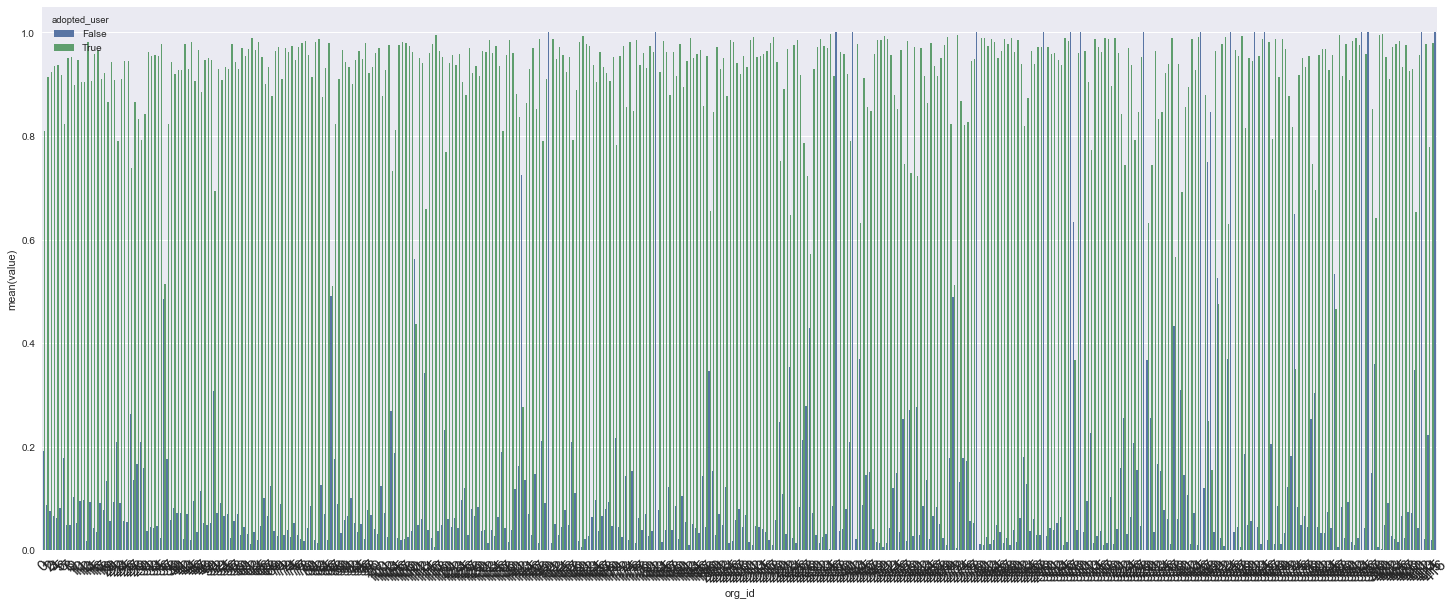

In [12]:
stacked = df_org_a.stack().reset_index().rename(columns={0:'value'})

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 10

# plot grouped bar chart
sns.barplot(x=stacked.org_id, y=stacked.value, hue=stacked.adopted_user)
plt.xticks(rotation= 45, fontsize= 15)
plt.show()

There are too many  values to ge ta clear idea of which orgs are different, but it is noticable that there are some with specifically higher False values then the others.

In [14]:
df_org_a= df_org_a.unstack()
df_org_ad= df_org_a.transpose()
df_org_ad= pd.DataFrame(df_org_ad)
df_org_ad.reset_index(inplace=True)
df_org_ad.columns

Index(['org_id', 'adopted_user', 0], dtype='object')

In [15]:
df_org_false= df_org_ad.loc[df_org_ad['adopted_user'] == False].copy()

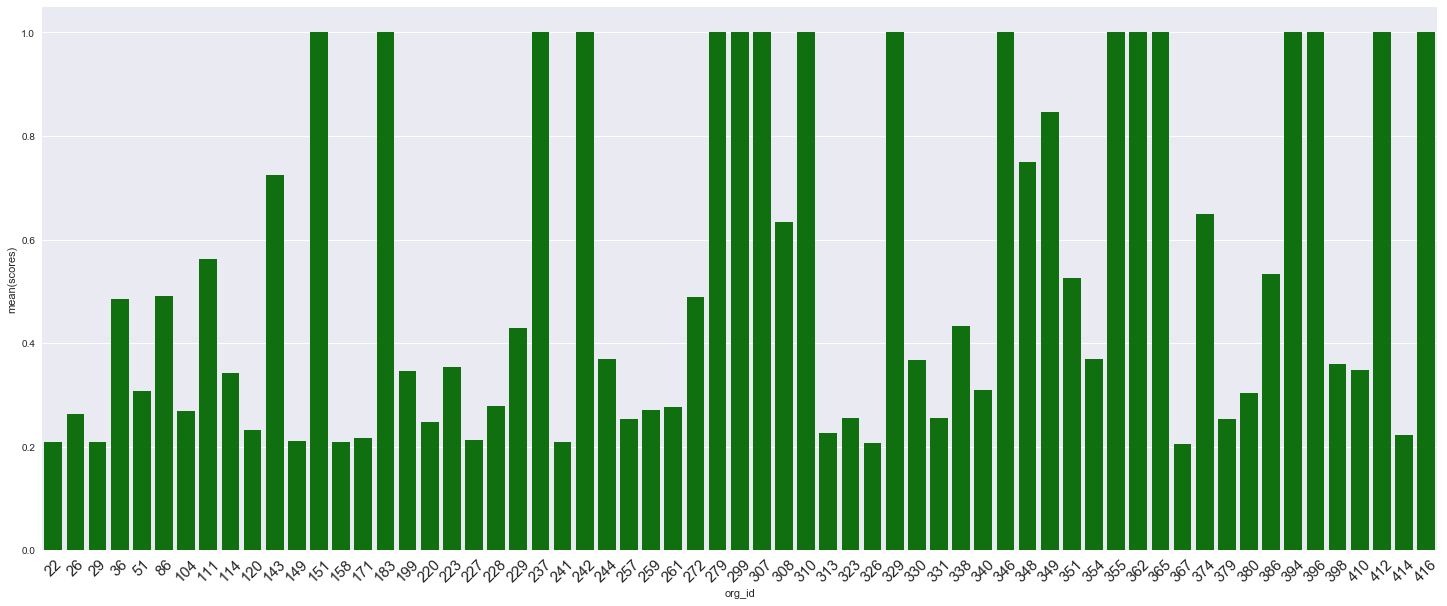

In [316]:
df_org_false_high= df_org_false.loc[df_org_false[0] > 0.2].copy()
df_org_false_high.columns= ['org_id', 'adopted_user', 'scores']
sns.barplot(x=df_org_false_high.org_id, y=df_org_false_high['scores'], color='green')
plt.xticks(rotation= 45, fontsize= 15)
plt.show()

There are clearly a few dozen options for 'org_id' that are good indicators of NOT becoming an adopted user. 

Which may be the explantion for the slightly lower adoption rate for organization-invited individuales vs. indivudal-invited individuals (94% to 96% respectively). 

Using logistic regression we can look at how well the different variables predict adopted users. I am using logisitic regression as it is a supervised machine learning technique that is well adopted for a binary explained variable. 

In [81]:
df_models= df_.copy()

# drop duplicate entries from duplicate log-ins- since we are only interested in user data
df_models= df_models.drop_duplicates(subset= 'user_id', keep='first')

# to use log regresor I am going to clean up the df into a simplier format
df_models['GUEST_INVITE'] = np.where(df_models.creation_source == 'GUEST_INVITE', 1, 0)
df_models['ORG_INVITE'] = np.where(df_models.creation_source == 'ORG_INVITE', 1, 0)
df_models['SIGNUP'] = np.where(df_models.creation_source == 'SIGNUP', 1, 0)
df_models['PERSONAL_PROJECTS'] = np.where(df_models.creation_source == 'PERSONAL_PROJECTS', 1, 0)
df_models['SIGNUP_GOOGLE_AUTH'] = np.where(df_models.creation_source == 'SIGNUP_GOOGLE_AUTH', 1, 0)
df_models= df_models.drop('creation_source', 1)
df_models= df_models.reset_index(drop=True)
df_models= df_models.drop('time_stamp', 1)
df_models= df_models.drop('email', 1)
df_models= df_models.drop('last_session_creation_time', 1)
df_models= df_models.drop('creation_time', 1)
df_models= df_models.drop('name', 1)
df_models= df_models.replace(np.nan, '0')
df_models= df_models.replace('', '0')

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#proof of concept
# imput as array
x= df_models.as_matrix(columns=['org_id'])
y = df_models.as_matrix(columns=['adopted_user'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) #split data

clf= LogisticRegression()
clf.fit(X_train,y_train.ravel())

print(accuracy_score(clf.predict(X_test), y_test))

0.814903846154


 It looks like- as suspected above- that the Organization ID is a very good predictor of how likely a user is to become an adopted user.  
 
Another potential variable to predict user adoption rates was Creation Source. Therefore, looking at all the creation source as a single predictor we see a similar accuracy score. 

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
cols= ['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS', 'SIGNUP_GOOGLE_AUTH']

#proof of concept
# imput as array
x= df_models.as_matrix(columns=[cols])
y = df_models.as_matrix(columns=['adopted_user'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) #split data

clf= LogisticRegression()
clf.fit(X_train,y_train.ravel())

print(accuracy_score(clf.predict(X_test), y_test))

0.814903846154


In [78]:
df_models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 11 columns):
user_id                       8823 non-null int64
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
invited_by_user_id            8823 non-null object
adopted_user                  8823 non-null bool
GUEST_INVITE                  8823 non-null int32
ORG_INVITE                    8823 non-null int32
SIGNUP                        8823 non-null int32
PERSONAL_PROJECTS             8823 non-null int32
SIGNUP_GOOGLE_AUTH            8823 non-null int32
dtypes: bool(1), int32(5), int64(4), object(1)
memory usage: 525.7+ KB


In [56]:

for column in df_models.iteritems():
    col_name= column[0]
    df_models[col_name]= df_models[col_name].astype(int)
    print("Prediction model testing:", col_name)
    
    # selecting dependent and independent variables from df
    x1= df_models.as_matrix(columns= [col_name])
    y1= df_models.as_matrix(columns= ['adopted_user'])
    
    X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.4)
    
    clf= LogisticRegression()
    clf.fit(X_train,y_train.ravel())
    print(accuracy_score(clf.predict(X_test), y_test))

Prediction model testing: user_id
0.81671388102
Prediction model testing: opted_in_to_mailing_list
0.820963172805
Prediction model testing: enabled_for_marketing_drip
0.811331444759
Prediction model testing: org_id
0.827195467422
Prediction model testing: invited_by_user_id
0.81388101983
Prediction model testing: adopted_user
1.0
Prediction model testing: GUEST_INVITE
0.825212464589
Prediction model testing: ORG_INVITE
0.816997167139
Prediction model testing: SIGNUP
0.813314447592
Prediction model testing: PERSONAL_PROJECTS
0.81388101983
Prediction model testing: SIGNUP_GOOGLE_AUTH
0.820963172805


When Looking at best single predictors we have Org_id (matches analysis above), guest invite (unsurprising from the cumulative customer referal regression model above), and opted_into mailing list. 

For one more look I will create a regression model looking at multiple variables at a time. The model that does the worst with one or more dropped variable will help us confirm and/or narrow down which predictors are the most important for identifying users who will likely become adopted users. 

In [87]:
# isolate adopted_user to keep from false positive result in multi result
df_columns= df_models.drop('adopted_user', 1)

In [88]:
for column in df_columns.iteritems():
    col_name= column[0]
    df_columns[col_name]= df_columns[col_name].astype(int)
    print("Prediction model missing data on:", col_name)
    temp_df=df_columns.drop([col_name], 1) # dropping the defined column
    col_list= temp_df.columns # list containing all other column names
    
    # selecting dependent and independent variables from df
    x1= df_columns.as_matrix(columns= [col_list])
    y1= df_models.as_matrix(columns= ['adopted_user'])
    
    X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.4)
    
    clf= LogisticRegression()
    clf.fit(X_train,y_train.ravel())
    print(accuracy_score(clf.predict(X_test), y_test))

Prediction model missing data on: user_id
0.826345609065
Prediction model missing data on: opted_in_to_mailing_list
0.824079320113
Prediction model missing data on: enabled_for_marketing_drip
0.818696883853
Prediction model missing data on: org_id
0.816997167139
Prediction model missing data on: invited_by_user_id
0.814164305949
Prediction model missing data on: GUEST_INVITE
0.81388101983
Prediction model missing data on: ORG_INVITE
0.825495750708
Prediction model missing data on: SIGNUP
0.829461756374
Prediction model missing data on: PERSONAL_PROJECTS
0.820113314448
Prediction model missing data on: SIGNUP_GOOGLE_AUTH
0.81671388102


# Final Thoughts
Org_ID and Guest invite continue to be the best predictors of adopted users